# Scoping

### Project Goals

This project is designed to utilize the skills I have learned and apply machine learning techniques to a data set. I went into this project blind and thus this project is meant to outline my method to understand and refine a dataset from scratch and derive insights from it. The initial guidance I recieved was to decide a research question at this point but without understanding the contents of a dataset, its limits and quirks, that would in my humble opinion be impossible to do.

### Methodology

My Method is inspired by the one provided in: {insert book title here} (which is available neatly in appendix B pg. 497). 

However, against the apparent rigid and formulaic nature of the method provided therin I prefer to keep my processes iterative (recursive in a way) and dynamic. The format of this document may lead to you believe that I have gone about this project in clear steps and stages but this is mostly a function of the need for presentability and concistency. The process here is iterative and dynamic.
    
(Especially between the cleaning and exploratitory parts there is a lot of back and forth in understanding and refining the dataset to a state of usability I deem acceptable.)

1. Preliminary Analysis - Quick look at the dataset, preparation for test integrity and initial assessment of usefullness for the task ahead.
2. Cleaning Data - serves primarily as a cleaning of the dataset but also as an initial analysis of each of the attributes. (This is exhaustive but also good practice in refining a dataset)
3. Exploratory Analysis - Explore the datasets relationships and patterns incl. its noisiness, distribution and possible usefulness for the task ahead. (Note: this is done after the clean so as to not have the exploration biased by missing values, incorrect inputs e.tc )
4. Framing - Decide and Assess an objective, think about what a solution would look like, how I would measure its performance and list assumptions.
5. Experimentation and refienment - testing models, validating them and evaluating them.
6. Presentation and Interpretation - show the results and interpet them in the context of the research question

The primary research question that I have detemerined to be answered is that of whether

### Assumptions


# Import Python Modules
First things first is to import the python modules I will be using for this project.

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Preliminary Analysis

### Loading the Data

The first step I take is to load the provided data into a pandas DataFrame object so that it can be efficiently explored and manipulated in python.

This involves the file `profiles.csv` being loaded into the `profiles` DataFrame. It is subsequently displayed for examination.

In [81]:
df = pd.read_csv('profiles.csv', encoding = 'utf-8')
df.reset_index()
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\r\n<br />\r\ni would love to t...,currently working as an international agent fo...,making people laugh.<br />\r\nranting about a ...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\r\...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\r\nhttp://b...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Straight away I can tell there is no point in looking at the value counts of the `essay{number}` columns as they are more likely infinitely variable, will not have any repeating entries and this project doesn't involve NLP. Let's drop them immediately.

In [82]:
essays = [f'essay{i}' for i in range(0, 10, 1)]
df.drop(essays, axis = 1, inplace = True)

### Identifying the Data Characteristics

First it is advisable to look at the data types and columns presented to us in the data and determine how much data we are dealing with exactly.

Doing a few simple calls to variables of the dataframe reveals that our dating profiles data consists of 59,946 rows (or users) and 31 attributes/columns.

Each column's name is sort of self descriptive of what sort of information is expected therein so there is no need to elaborate them here, any nuance within them will be explained in further parts.

In [83]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  orientation  59946 non-null  object 
 14  pets         40025 non-null  object 
 15  religion     39720 non-null  object 
 16  sex          59946 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

In [84]:
for col in df.select_dtypes(include = 'object').columns:
    df[col] = df[col].astype(str)

### Setting Asside A Sample Test Set

This ensures we keep data snooping bias out of our project! The dataset is quite large so I am assuming there is no need for stratefied sampling. The following code ensures that we can reuse our split despite modification or removal of rows.

In [85]:
###Uncomment the following code to create new csv with identifiers###
from reproducable_split import add_identifiers
add_identifiers(df, create_new = True, new_name = "profiles_identifiers")

In [86]:
### Uncomment the following code to create a new split map ###
from reproducable_split import create_splitmap
profiles = pd.read_csv("profiles_identifiers.csv")
create_splitmap(profiles)

Here we are creating a small function that creates our train set `working` which we will use to do our analysis of the dataset while keeping our future training set out of sight as to avoid bias. 

There are obviously some points of analysis that we can use with our entire set and won't compromise the integreity of our tests as you will see later. 

All modifications will be done to the profiles dataset. Then we can recreate the working dataset to continue looking at our variables. 

In [87]:
#Here we bring in the profiles with identifiers I have created earlier
profiles = pd.read_csv("profiles_identifiers.csv")

#As well as the split map
split_map = pd.read_csv("split_mapping.csv")

profiles = profiles.merge(split_map, on = "unique_id", how = "inner")

#Remove uneccessary attributes
profiles.drop(columns = ['unique_id'], inplace = True)

def create_working(df, split_map):
    train_df = df[df["which_set"] == "train"]
    working = train_df.copy()
    return working

def create_holding(df, split_map):
    test_df = df[df["which_set"] == "test"]
    holding = test_df.copy()
    return holding


working = create_working(profiles, split_map)

# Data Cleaning

First up is to clean the data and make sure it is suitable for use. My cleaning process for a single dataset consists of five steps:


1. Handling duplicate rows
2. Simplifying and standardizng attributes 
3. Handling missing values
4. Handling outliers + noise
5. Handling inconsitent attributes 

## Handling Duplicates

Luckily our dataset does not have any duplicate entries so we can skip this step.

In [88]:
profiles.duplicated().sum()

np.int64(0)

Looks like we are all clear on duplicate entries.

## Simplifying attributes

This section's general aim is to simplify primarily categorical attributes that have way too many different catagories and potentially give NA entries actual values.

From a brief look at the number of unique values and a little reference back up to our dtypes (plus a little behind the scenes checks on value counts) we can see that a few columns are up for a little simplification, these being:

1. education
2. ethnicity
3. speaks
4. pets
5. religion
6. sign
7. speaks
8. diet
9. offspring

Additionally we want to sort out the corrupted strings in:
1. offspring
2. sign

#NOTE INCOME IS FUNNY AS IT MIGHT AS WELL BE CATEGORICAL AS IT IS A SET OF NUMERICAL BRACKETS (ie. 20000, 100000, 80000) that people are put under.

### Simplifying Education

In [89]:
working.education.value_counts(dropna = False)

education
graduated from college/university    21574
graduated from masters program        8095
NaN                                   5953
working on college/university         5147
working on masters program            1529
graduated from two-year college       1374
graduated from high school            1276
graduated from ph.d program           1138
graduated from law school             1003
working on two-year college            944
dropped out of college/university      888
working on ph.d program                882
college/university                     725
graduated from space camp              599
dropped out of space camp              470
graduated from med school              412
working on space camp                  396
working on law school                  250
two-year college                       197
working on med school                  190
dropped out of two-year college        167
dropped out of masters program         125
masters program                        121
d

From looking at education we can see that it has way too many possible categories but it essentially boils down to two changing points of information (leaving out NaN of course).

1. Status: Has the person graduated, learning or dropped out of their educational program.
2. Program: The particular educational program in question

This is quite easy to simplify, we can just split this single column with a high amount of values into two columns with much less variation.

In [90]:
#Here is a little helper function to assist us in seperating out these two pieces of information.
#it takes the list of values I have found for each point of information in the education column
#and checks if each value is in the string and if so returns that value.
#Please note that the string1 argument is to adress a particular flaw where the user does not have a status.
#It is my assupmtion that whoever does not have a status is graduated.
#Function also persists NA values
def replacer(lst, x, string1 = None):
    if isinstance(x, str):
        for l in lst:
            if l.lower() in x.lower():
                return l
        if isinstance(string1, str):
            return string1
    else:
        return pd.NA

In [91]:
#create new column for education level
edu = ['space camp', 'high school', 'two-year college', 'college/university', 'law school', 'med school', 'masters', 'ph.d']
profiles['education_level'] = profiles['education'].apply(lambda x: replacer(edu, x))

#create new column for education status 
edu = ['dropped out', 'working on', 'graduated']
profiles['education_status'] = profiles['education'].apply(lambda x: replacer(edu, x, 'graduated'))

working = create_working(profiles, split_map)
print(working.education_level.value_counts(dropna = False))
print(working.education_status.value_counts(dropna = False))

education_level
college/university    28334
masters                9870
<NA>                   5953
two-year college       2682
ph.d                   2157
high school            1534
space camp             1513
law school             1284
med school              624
Name: count, dtype: int64
education_status
graduated      36693
working on      9418
<NA>            5953
dropped out     1887
Name: count, dtype: int64


### Simplifying Ethnicity

I would like to note that I have come back to this attribute after reviewing my work and would like to clarify that when I address this particular attribute that I have no intention of using it in my analysis. This is becauce while this attribute is named "ethnicity", based on the labels within it, it is more akin to race. While this attribute could be potentially useful for machine learning some sort of relation with a person's percieved race I do not percieve it necessary or useful for an analysis and personally do not believe it would hold any value.

Regardless I will display how I attempted to simplify the many categories of this attribute. Take its methodology and assumptions as you will.

In [92]:
working.ethnicity.head(10)

1                   white
2                     NaN
3                   white
4     asian, black, other
6            white, other
8                   white
9                   white
10                  white
11                  white
12                  white
Name: ethnicity, dtype: object

In [93]:
working.ethnicity.value_counts(dropna = False)

ethnicity
white                                                                     29517
asian                                                                      5552
NaN                                                                        5118
hispanic / latin                                                           2542
black                                                                      1799
                                                                          ...  
asian, middle eastern, native american, pacific islander, white, other        1
middle eastern, black, other                                                  1
asian, middle eastern, black, pacific islander, hispanic / latin              1
asian, black, pacific islander, white, other                                  1
asian, black, indian                                                          1
Name: count, Length: 210, dtype: int64

One of first things we can notice about our ethnicity values is that there are a lot of people who are an ethnicity onto themselves, which might be interesting for anthropologists but unfortunately for us is not very good for ML models as they aren't very generalizable.

Let's make things a bit simpler and of course this involves an assumption:

1. If a person has multiple ethnicities (more than 3) they can be assumed to be part of a group (mixed) and that this group can be generalized to be the same and the patterns in the data are still maintained. (FLAWED?)

The rest will be simplified by splitting people into their primary and secondary ethnicity (the majority of the dataset adheres to this cleanly) while people with multiple ethnicities will be put down as mixed for both ethnicity 1 and 2.

In [94]:
#This is a little helper function made to cut down any multiple ethnicity entires into something more palatable.
#Comments explain what it does for this particualr attribute.
def long_handler(x, string1):
    if isinstance(x, str):
        x = x.split(",")

        if len(x) < 3:
            if len(x) == 1:
                return(x.pop()) # if someone is just 1 ethnicity than return that one ethnicity
            else:
                return x # if someone is two ethnicities than just send those back too
        else:
            return string1 #if the number of ethnicities a person is, is greater than 3 then return them as mixed
    
    else:
        return pd.NA #if the entry is N/A or somehow not a string then return N/A


In [95]:
profiles.ethnicity = profiles.ethnicity.apply(lambda x: long_handler(x, 'mixed'))
profiles["ethnicity_1"] = profiles.ethnicity.apply(lambda x: x[0] if isinstance(x, list) else x)
profiles["ethnicity_2"] = profiles.ethnicity.apply(lambda x: x[1] if isinstance(x, list) else x)

working = create_working(profiles, split_map)
working[["ethnicity_1", "ethnicity_2"]].head(10)

,ethnicity_1,ethnicity_2
1,white,white
2,<NA>,<NA>
3,white,white
4,mixed,mixed
6,white,other
8,white,white
9,white,white
10,white,white
11,white,white
12,white,white


In [96]:
profiles.drop(columns = ["ethnicity_1", "ethnicity_2"], inplace = True)

### Simplifying Pets

In [97]:
working.pets.value_counts(dropna = False)

pets
NaN                                17889
likes dogs and likes cats          13375
likes dogs                          6512
likes dogs and has cats             3855
has dogs                            3753
has dogs and likes cats             2084
likes dogs and dislikes cats        1844
has dogs and has cats               1334
has cats                            1257
likes cats                           941
has dogs and dislikes cats           496
dislikes dogs and likes cats         215
dislikes dogs and dislikes cats      172
dislikes cats                        110
dislikes dogs and has cats            75
dislikes dogs                         39
Name: count, dtype: int64

The `pets` column has a lot of different categories but can be easily simplified into two columns where cat and dog dispositions are represented seperately.

In [98]:
#Another little helper function made to seprate our pet lovers opinions on cats and dogs clearly.
def pet_sentiment(x, pet: str):

    if isinstance(x, str):
        if " and " in x:
            result = x.split(" and ")
            if pet == 'dog':
                result1 = result[0].removesuffix(" dogs")
                return result1
            elif pet == 'cat':
                result2 = result[1].removesuffix(" cats")
                return result2
    
        elif  pet == 'dog':
            if "dogs" in x:
                result1 = x.removesuffix(" dogs")
                return result1
            else:
                return 'no opinion'
        elif pet == 'cat':
            if "cats" in x:
                result2 = x.removesuffix(" cats")
                return result2
            else:
                return 'no opinion'
    else:   
        return pd.NA

In [99]:
profiles['dogs'] = profiles.pets.apply(lambda x: pet_sentiment(x, 'dog'))
profiles['cats'] = profiles.pets.apply(lambda x: pet_sentiment(x, 'cat'))

working = create_working(profiles, split_map)
working[['cats', 'dogs']].head(20)

,cats,dogs
1,likes,likes
2,has,no opinion
3,likes,no opinion
4,likes,likes
6,likes,likes
8,likes,likes
9,likes,likes
10,<NA>,<NA>
11,likes,no opinion
12,<NA>,<NA>


### Simplifying `religion`

In [100]:
working.religion.value_counts(dropna = False)

religion
NaN                                           18188
agnosticism                                    2458
other                                          2440
agnosticism but not too serious about it       2363
agnosticism and laughing about it              2260
catholicism but not too serious about it       2100
atheism                                        1956
other and laughing about it                    1898
atheism and laughing about it                  1874
christianity                                   1749
christianity but not too serious about it      1743
other but not too serious about it             1398
judaism but not too serious about it           1372
atheism but not too serious about it           1182
catholicism                                     948
christianity and somewhat serious about it      820
other and somewhat serious about it             761
atheism and somewhat serious about it           754
catholicism and laughing about it               671
jud

Another attribute with a lot of N/A but looking at the actual data here we can clearly see that this attribute containts two specific parts of a persons religion. These being
1. Their actual religion
2. Their seriousness about it

So to capture this and reduce our possible values we can just cut it cleanly into the much more limited options of `religous_prefence` (8 possible values from my counts) and `religious_sentiment` (4 possible values) greatly reducing the possible values of this attribute from 45 possible values (excluding N/A) (Some entries don't have sentiment)

In [101]:
def replacer(lst, x, string1 = None):
    if isinstance(x, str):
        for l in lst:
            if l.lower() in x.lower():
                return l
        if isinstance(string1, str):
            return string1
    else:
        return pd.NA

In [102]:
religions = ['christianity', 'islam', 'judaism', 'buddhism', 'hinduism', 'agnosticism', 'atheism', 'other']
profiles['religious_preference'] = profiles.religion.apply(lambda x: replacer(religions, x))


sentiment = ['laughing about it', 'not too serious about it', 'somewhat serious about it', 'very serious about it']
profiles['religious_sentiment'] = profiles.religion.apply(lambda x: replacer(sentiment, x, 'no opinion'))

In [103]:
working = create_working(profiles, split_map)
working[["religious_preference", "religious_sentiment"]].head(10)

,religious_preference,religious_sentiment
1,agnosticism,not too serious about it
2,<NA>,<NA>
3,<NA>,<NA>
4,<NA>,<NA>
6,<NA>,<NA>
8,christianity,not too serious about it
9,atheism,laughing about it
10,<NA>,<NA>
11,christianity,very serious about it
12,other,no opinion


### Simplifying `sign`

In [104]:
working.sign.value_counts(dropna = False)

sign
NaN                                              9912
scorpio and it&rsquo;s fun to think about        1596
gemini and it&rsquo;s fun to think about         1596
leo and it&rsquo;s fun to think about            1522
libra and it&rsquo;s fun to think about          1486
taurus and it&rsquo;s fun to think about         1465
sagittarius and it&rsquo;s fun to think about    1440
aries and it&rsquo;s fun to think about          1431
virgo and it&rsquo;s fun to think about          1422
cancer and it&rsquo;s fun to think about         1421
pisces and it&rsquo;s fun to think about         1420
virgo but it doesn&rsquo;t matter                1361
aquarius and it&rsquo;s fun to think about       1350
cancer but it doesn&rsquo;t matter               1316
taurus but it doesn&rsquo;t matter               1308
leo but it doesn&rsquo;t matter                  1299
gemini but it doesn&rsquo;t matter               1294
aquarius but it doesn&rsquo;t matter             1273
libra but it doesn&rsqu

Sign is very similar to religion and can be handled similarly. Only we seem to have a problem with character encoding. That can be easily fixed however.

In [105]:
profiles.sign = profiles.sign.apply(lambda x: x.replace('&rsquo;', "\'") if isinstance(x, str) else x)
star_signs = ['gemini', 'scorpio', 'leo', 'virgo', 'cancer', 'taurus', 'libra', 'aries', 'aquarius', 'pisces', 'capricorn', 'sagittarius']
profiles['star_sign'] = profiles.sign.apply(lambda x: replacer(star_signs, x))

sign_sentiment = ['it\'s fun to think about', 'it doesn\'t matter', 'it matters a lot']
profiles['sign_sentiment'] = profiles.sign.apply(lambda x: replacer(sign_sentiment, x, 'no opinion'))

In [106]:
working = create_working(profiles, split_map)
working[['star_sign', 'sign_sentiment']].head(10)

,star_sign,sign_sentiment
1,cancer,no opinion
2,pisces,it doesn't matter
3,pisces,no opinion
4,aquarius,no opinion
6,virgo,no opinion
8,gemini,it doesn't matter
9,cancer,it doesn't matter
10,taurus,no opinion
11,leo,it doesn't matter
12,taurus,no opinion


### Simplifying `speaks`

In [107]:
working.speaks.head(10)

1     english (fluently), spanish (poorly), french (...
2                                  english, french, c++
3                              english, german (poorly)
4                                               english
6                                               english
8                                               english
9                                    english (fluently)
10                                              english
11           english (fluently), sign language (poorly)
12                                              english
Name: speaks, dtype: object

In [108]:
working.speaks.value_counts(dropna = False)

speaks
english                                                                        19616
english (fluently)                                                              5967
english (fluently), spanish (poorly)                                            1838
english (fluently), spanish (okay)                                              1720
english (fluently), spanish (fluently)                                          1181
                                                                               ...  
english (fluently), portuguese (fluently), spanish (fluently), french              1
english (fluently), chinese (okay), dutch (poorly)                                 1
english (fluently), italian (fluently), spanish (poorly), romanian (poorly)        1
english (fluently), spanish (poorly), italian (poorly), khmer (poorly)             1
english (fluently), ukrainian (fluently), russian (fluently)                       1
Name: count, Length: 7078, dtype: int64

For speaks we are going to try something different, while we could list all the different languages, I feel capturing a person's english speaking ability would be a much more interesting attribute to have in our data. Let's just check how many of our subjects actually speak english.

In [109]:
print(len(profiles['speaks']))
speakeasy = profiles['speaks'].str.contains(r'english', case = False, na = False).sum()
int(speakeasy)

59946


59896

Initially it appears that 50 of our subjects don't speak any english, but with a little tweaking of the above function you can find that these subjects just have No language data. Which for now isn't that important, its just something to be aware of.

Now lets try and isolate the english part of each subjects language ability (if we have it of course).

In [110]:
profiles["english"] = profiles.speaks.apply(lambda x: x.lower().split(",") if isinstance(x, str) else x) #turn each string into a list (luckily our languages are already comma-seperated)
profiles['english'] = profiles.english.apply(lambda x: [entry.lstrip() for entry in x if 'english' in entry.lower()] if isinstance(x, list) else None)

working = create_working(profiles, split_map)
working['english'].value_counts(dropna = False)

english
[english]                                                                                               26858
[english (fluently)]                                                                                    25219
[english (okay)]                                                                                          946
[english (poorly)]                                                                                        531
[english, english]                                                                                        104
[english, english (fluently)]                                                                             103
None                                                                                                       46
[english (fluently), english]                                                                              29
[english (fluently), english (fluently)]                                                                   27
[e

Seems like some of our entries put multiple levels of english in their languages. Let's fix that.

In [111]:
# create a string to hold my personal ranking of english fluency to handle multiple english entries.
english_scale = {'english(fluently)': 1, 'english': 2, 'english(okay)': 3, 'english(poorly)': 4}

def fix_english(english_list:list, english_scale:dict):

    current = english_list[0]
    if len(english_list) > 1:
        for i in range(1, len(english_list)):
            if english_scale[current] > english_scale[english_list[i]]:
                current = english_list[i]
        return current
    else:
        return current

profiles['english'] = profiles.english.apply(lambda x: [z.replace(" ", "") for z in x] if isinstance(x, list) else None)
profiles['english'] = profiles.english.apply(lambda x: fix_english(x, english_scale) if isinstance(x, list) else None)

working = create_working(profiles, split_map)
working['english'].value_counts(dropna = False)

english
english              26982
english(fluently)    25437
english(okay)          954
english(poorly)        532
None                    46
Name: count, dtype: int64

And that's the english colomn sorted, looking a lot cleaner and a lot neater!

### Simplifying `offspring`

In [112]:
working.offspring.value_counts(dropna = False)

offspring
NaN                                                    32004
doesn&rsquo;t have kids                                 6851
doesn&rsquo;t have kids, but might want them            3492
doesn&rsquo;t have kids, but wants them                 3202
doesn&rsquo;t want kids                                 2626
has a kid                                               1697
has kids                                                1683
doesn&rsquo;t have kids, and doesn&rsquo;t want any      995
has kids, but doesn&rsquo;t want more                    401
has a kid, but doesn&rsquo;t want more                   242
wants kids                                               207
has a kid, and might want more                           206
might want kids                                          168
has kids, and might want more                             96
has a kid, and wants more                                 63
has kids, and wants more                                  18
Name: count, d

let's keep things simple with this one and just refine it to those who have kids and those who do not

In [113]:
def kids_handler(x):
    if isinstance(x, str):
        result = x.split(" kid")[0]
        if result == "has a" or result == "has":
            return "has"
        else:
            return "doesn't have"
    else:
        return pd.NA

In [114]:
profiles.offspring = profiles.offspring.apply(lambda x: x.replace('&rsquo;', "\'") if isinstance(x, str) else x)
profiles['offspring'] = profiles.offspring.apply(lambda x: kids_handler(x))

working = create_working(profiles, split_map)
working.offspring.value_counts(dropna = False)

offspring
<NA>            32004
doesn't have    17541
has              4406
Name: count, dtype: int64

### Simplifying `diet`

In [115]:
working.diet.value_counts(dropna = False)

diet
NaN                    22019
mostly anything        14860
anything                5552
strictly anything       4609
mostly vegetarian       3093
mostly other             894
strictly vegetarian      790
vegetarian               603
strictly other           401
mostly vegan             319
other                    303
strictly vegan           207
vegan                    126
mostly kosher             79
mostly halal              45
strictly kosher           16
strictly halal            15
halal                     10
kosher                    10
Name: count, dtype: int64

In [116]:
def replacer(lst, x, string1 = None):
    if isinstance(x, str):
        for l in lst:
            if l.lower() in x.lower():
                return l
        if isinstance(string1, str):
            return string1
    else:
        return pd.NA

In [117]:
diets = ['vegetarian', 'vegan', 'anything', 'kosher', 'halal', 'other']
profiles['diet'] = profiles['diet'].apply(lambda x: replacer(diets, x))

In [118]:
working = create_working(profiles, split_map)
working.diet.value_counts(dropna = False)

diet
anything      25021
<NA>          22019
vegetarian     4486
other          1598
vegan           652
kosher          105
halal            70
Name: count, dtype: int64

### Simplification Review


We still have a few of our old attributes to remove, these being: `education`, `ethnicity`, `pets`, `religion`, `sign` and `speaks`.

In [119]:
profiles.drop(columns = ['education', 'ethnicity', 'pets', 'religion', 'sign','speaks'], inplace = True)
working = create_working(profiles, split_map)
profiles.dtypes

age                       int64
body_type                object
diet                     object
drinks                   object
drugs                    object
height                  float64
income                    int64
job                      object
last_online              object
location                 object
offspring                object
orientation              object
sex                      object
smokes                   object
status                   object
which_set                object
education_level          object
education_status         object
dogs                     object
cats                     object
religious_preference     object
religious_sentiment      object
star_sign                object
sign_sentiment           object
english                  object
dtype: object

## Handling Missing Values

Next up is check which values have nulls and then handling them if they do in a way that is essentially up to my own discretion, however I try to use multiple techniques to handle nulls. 

If we check our columns we can see that theres a few rows that are 100% good to go on that front but beyond this we have a select few rows mainly on extraneous personal data that our users probably didn't want to or coulnd't be bothered to fill in.

My Null Handling Methodology:

1. Find how many values are missing + what percentage of the attribute is missing
2. Try and find out why they might be missing (MCAR, MAR, MNAR)
3. Implement a solution to the nulls

In [120]:
nulls = working.isna().sum().sort_values()
nulls[nulls > 0]

height                      2
english                    46
drinks                   2673
body_type                4760
smokes                   4966
education_level          5953
education_status         5953
job                      7381
sign_sentiment           9912
star_sign                9912
drugs                   12676
cats                    17889
dogs                    17889
religious_sentiment     18188
diet                    22019
religious_preference    22489
offspring               32004
dtype: int64

#### MCAR Test

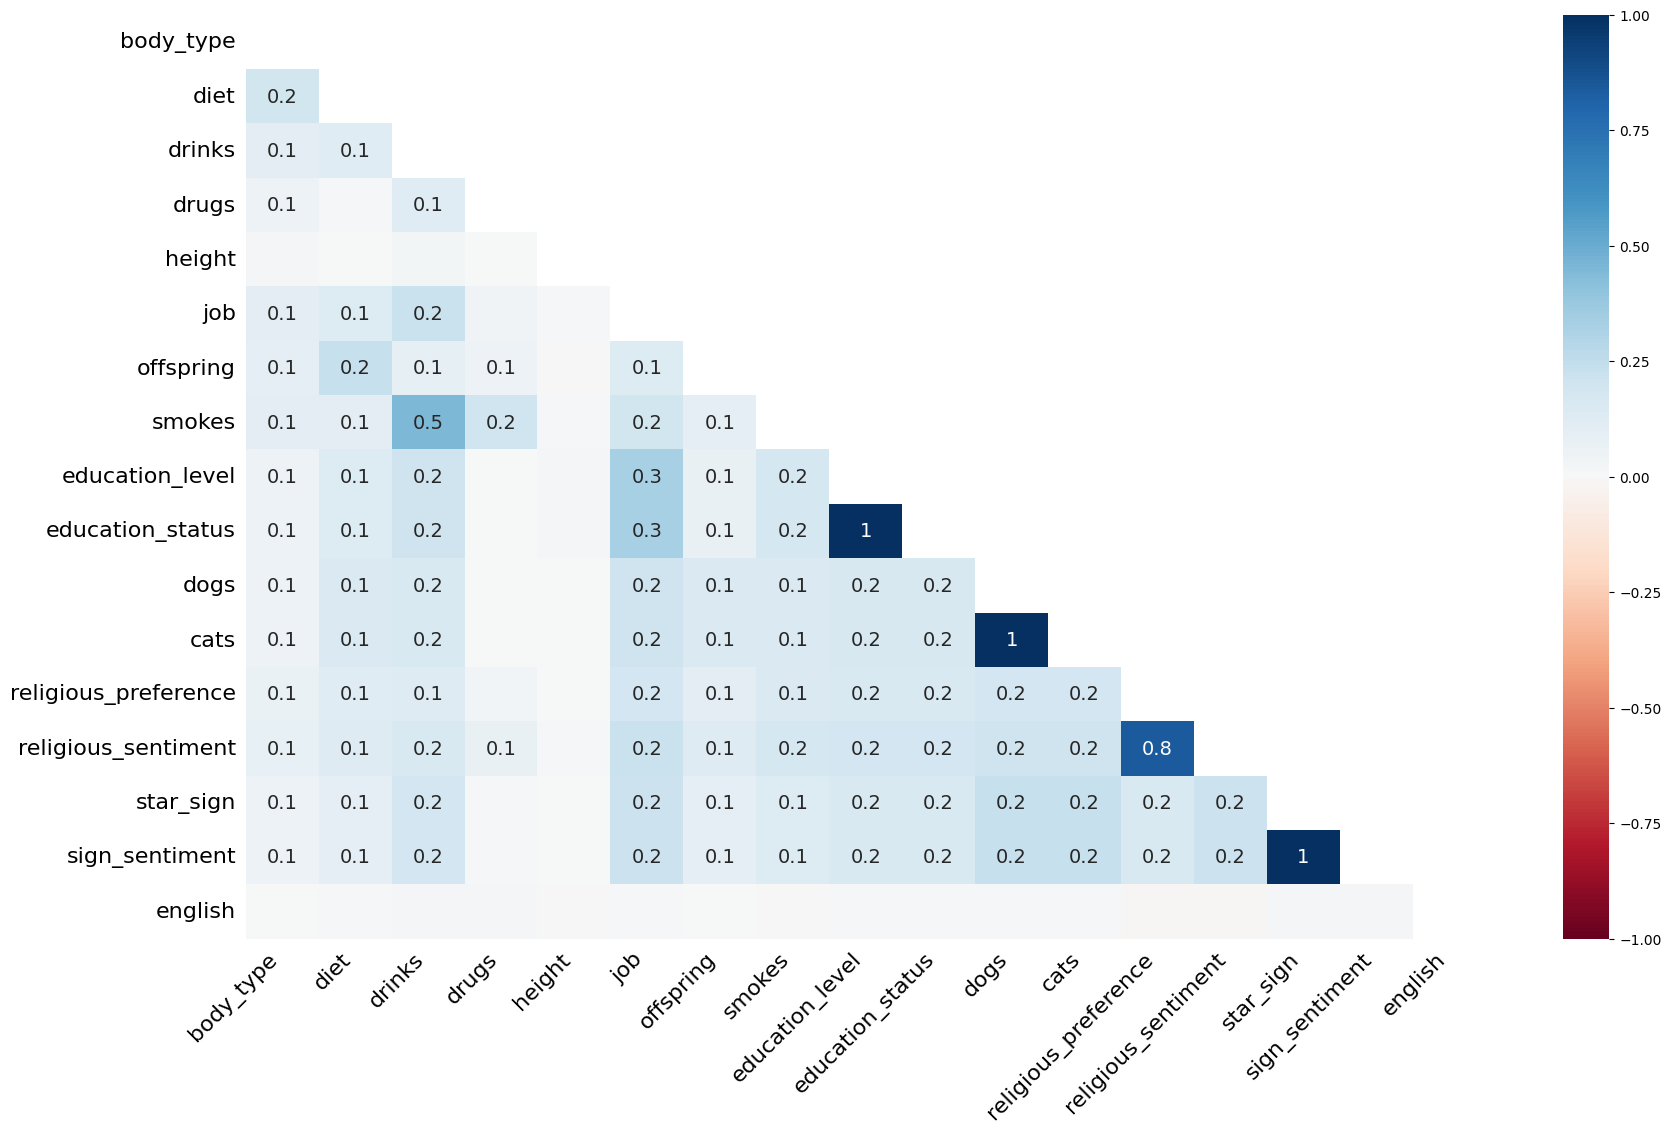

In [121]:
import missingno as msno

msno.heatmap(working, )
plt.show()

### Removing High Null Rows

I have decided that rows that have more than 40% of their attributes missing are to just be thrown out.

In [122]:
print("DataFrame shape prior to removal: ", profiles.shape)
profiles['null_count'] = profiles.isna().sum(axis = 1)
profiles = profiles[profiles['null_count'] < (0.4 * profiles.shape[1])]
profiles.drop(columns = ['null_count'], inplace = True)
print("DataFrame shape post removal: ", profiles.shape)
working = create_working(profiles, split_map)

DataFrame shape prior to removal:  (59946, 25)
DataFrame shape post removal:  (58306, 25)


In [123]:
nulls = working.isna().sum().sort_values()
nulls = nulls[nulls > 0]
nulls_df = nulls.to_frame(name = 'null_count')
nulls_df['null_percentage'] = (nulls_df['null_count'] / len(profiles)) * 100

nulls_df

,null_count,null_percentage
english,37,0.063458
drinks,1737,2.979110
smokes,3949,6.772888
body_type,4339,7.441773
education_level,4673,8.014613
education_status,4673,8.014613
job,6086,10.438034
sign_sentiment,8581,14.717182
star_sign,8581,14.717182
drugs,12173,20.877783


### Handling `english` Nulls

`english` null count is low enough to be handled by **listwise deletion**.

In [124]:
profiles = profiles[~profiles['english'].isna()]

### Handling `drinks` nulls

In [125]:
profiles['drinks'] = profiles['drinks'].fillna('rather not say')

### Handling `body_type` nulls

In [126]:
profiles['body_type'] = profiles['body_type'].fillna('rather not say')

### Handling `smokes` nulls

In [127]:
profiles['smokes'] = profiles['smokes'].fillna('rather not say')

### Handling `education_status` and `education level` nulls

In [128]:
profiles['education_level'] = profiles['education_level'].fillna('uneducated')
profiles['education_status'] = profiles['education_status'].fillna('uneducated')

### Handling `job` nulls

In [129]:
profiles['job'] = profiles['job'].fillna('unspecified')

### Handling `sign_sentiment` and `star_sign` nulls

In [130]:
profiles.drop(columns = ['sign_sentiment', 'star_sign'], inplace = True)

### Handling `drugs` nulls

In [131]:
profiles['drugs'] = profiles['drugs'].fillna('unspecified')

### Handling `dogs` and `cats`

In [132]:
profiles.drop(columns = ['dogs', 'cats'], inplace = True)

### Handling `religous_sentiment` and `religous_preference` nulls

In [133]:
profiles['religious_sentiment'] = profiles['religious_sentiment'].fillna('not specified')
profiles['religious_preference'] = profiles['religious_preference'].fillna('not specified')

### Handling `diet` nulls

In [134]:
profiles['diet'] = profiles['diet'].fillna('missing')

In [135]:
profiles.drop(columns = ['offspring'], inplace = True)

### Re-establish `working`

In [136]:
working = create_working(profiles, split_map)

## Handling Outliers

### Handling `age` outliers

In [137]:
#age is numerical so describe should give us a good idea of the distribution of the values (we already know the age column contains no nulls)
working['age'].describe()

count    52452.000000
mean        32.365039
std          9.444452
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        109.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

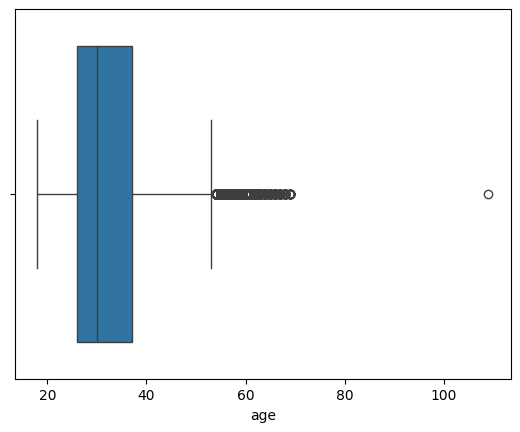

In [138]:
sns.boxplot(data = working, x = 'age')

In [139]:
#ages above 100 are removed
profiles = profiles[profiles["age"] <= 100]
working = create_working(profiles, split_map)
working['age'].describe() #resulting distribution looks a lot more realistic

count    52451.000000
mean        32.363577
std          9.438613
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

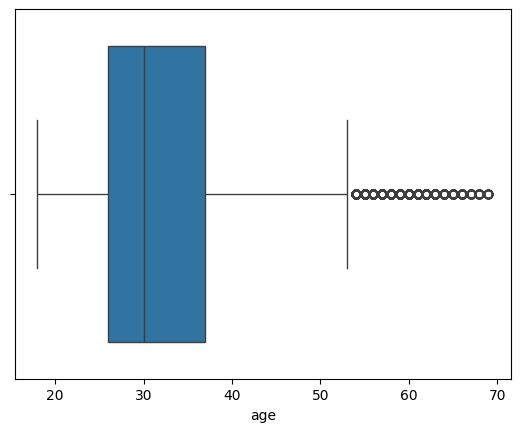

In [140]:
sns.boxplot(data = working, x = 'age')

### Handling `height` Outliers

Next is handling height, and taking a look immediately at the results of the `.describe()` method we can see  a big problem. our min height is someone who claims to be one inch tall. Moving on to the box plot we can see that a few people are also claiming to have a height smaller than the smallest person in the world Chandra Bahadur Dangi who is 21.5 inches tall. So let's immediately remove these jokers from our dataset.

In [141]:
working['height'].describe()

count    52451.000000
mean        68.287011
std          3.987606
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

<Axes: xlabel='height'>

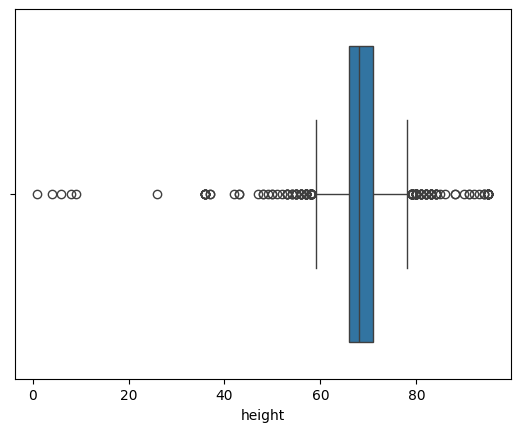

In [142]:
sns.boxplot(data = working, x = 'height')

In [143]:
profiles = profiles[profiles["height"] >= 40]
working = create_working(profiles, split_map)
working['height'].describe()

count    52434.000000
mean        68.300530
std          3.908974
min         42.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

<Axes: xlabel='height'>

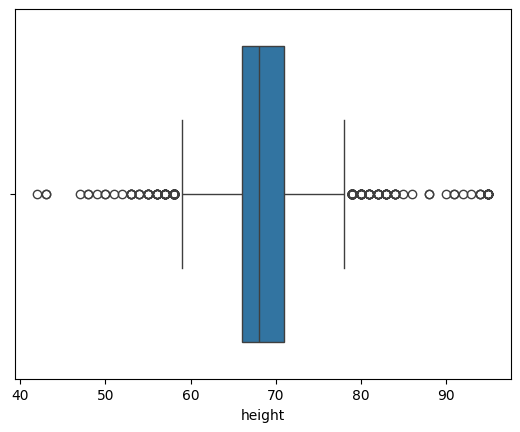

In [144]:
sns.boxplot(data = working, x = 'height')

### Handling `income` outliers
As bellow 80% of the values in this attribute are invalid. We can thus say that this attribute holds almost no explanitory or learning value for our uses further in the project. Thus rather than trying to fix this attribute via most likely flawed measures, I have deliberated and decided to remove this attribute. 

In [145]:
working.income.value_counts()

income
-1          42181
 20000       2627
 100000      1443
 80000        978
 30000        942
 40000        894
 50000        876
 60000        667
 70000        628
 150000       574
 1000000      452
 250000       129
 500000        43
Name: count, dtype: int64

In [146]:
(working["income"] == -1).sum() / working.income.count()

np.float64(0.8044589388564671)

In [147]:
profiles.drop(columns = ['income'], inplace = True)
working = create_working(profiles, split_map)

## Handling Inconsistent Variables

In [148]:
location_counts = profiles.location.value_counts().reset_index()
location_counts.columns = ['location', 'count']
location_counts

,location,count
0,"san francisco, california",30183
1,"oakland, california",7051
2,"berkeley, california",4106
3,"san mateo, california",1296
4,"palo alto, california",1039
...,...,...
190,"denver, colorado",1
191,"seattle, washington",1
192,"cincinnati, ohio",1
193,"phoenix, arizona",1


In [149]:
#from geopy.geocoders import Nominatim
#import folium
#geolocator = Nominatim(user_agent = "geoapp")

#def geocode_loc(loc):
    #try:
        #geo = geolocator.geocode(loc)
        #return (geo.latitude, geo.longitude) if geo else (None, None)
    #except:
        #return (None, None)

#location_counts[['latitude', 'longitude']] = location_counts['location'].apply(lambda x: pd.Series(geocode_loc(x)))
#ocation_counts = location_counts.dropna(subset=['latitude', 'longitude'])

In [150]:
#min_radius = 3
#max_radius = 50
#location_counts['radius'] = location_counts['count'].apply(lambda x: min_radius + (np.log10(x) / np.log10(location_counts['count'].max())) * (max_radius - min_radius))

#m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

#for _, row in location_counts.dropna(subset=['latitude', 'longitude']).iterrows():
    #folium.CircleMarker(
        #location=[row['latitude'], row['longitude']],
        #radius=row['radius'],
        #popup=f"{row['location']}: {row['count']}",
        #color='blue',
        #fill=True,
        #fill_opacity=0.6
    #).add_to(m)

#m.save("bubble_map.html")

### Last_online

In [151]:
working.last_online.head()

1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
6    2012-06-25-20-45
Name: last_online, dtype: object

In [152]:
profiles.last_online = pd.to_datetime(working.last_online, format = "%Y-%m-%d-%H-%M")
working = create_working(profiles, split_map)

# Exploratory Data Analysis

In [153]:
working.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52434 entries, 1 to 59944
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   52434 non-null  int64         
 1   body_type             52434 non-null  object        
 2   diet                  52434 non-null  object        
 3   drinks                52434 non-null  object        
 4   drugs                 52434 non-null  object        
 5   height                52434 non-null  float64       
 6   job                   52434 non-null  object        
 7   last_online           52434 non-null  datetime64[ns]
 8   location              52434 non-null  object        
 9   orientation           52434 non-null  object        
 10  sex                   52434 non-null  object        
 11  smokes                52434 non-null  object        
 12  status                52434 non-null  object        
 13  which_set            

## Univariate Analysis

### Age Variation

In [154]:
working.age.describe()

count    52434.000000
mean        32.364134
std          9.439159
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

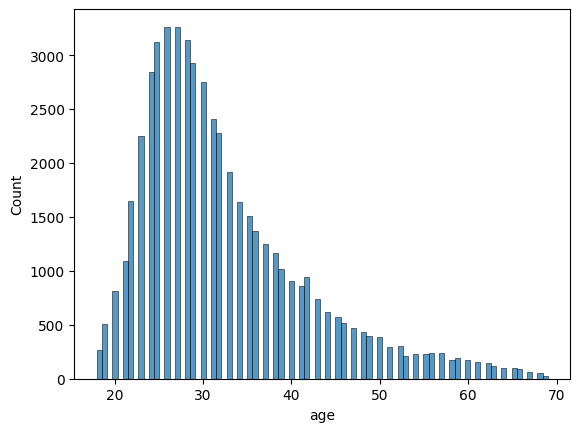

In [155]:
sns.histplot(data = working, x = "age")

### Body Type Variation

As we can see most people on the site consider themselves to be either average or fit/athletic, you would expect this as most people with societaly dictated "negative" body type would not be confident enough to be on a dating website or less likely to report this feature of themselves accurately. 

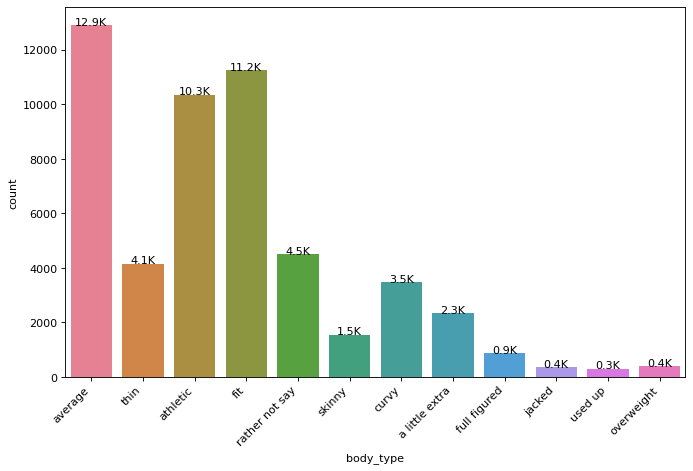

In [156]:
from my_functions import vc_hist

vc_hist(working, 'body_type')

### Diet Variation

Most people on the site expectedly have little to no dietary restriction or preference. Neglibile amounts of people on the dating site conform to religious diets (Maybe our site isn't that appealling to a religious audience)

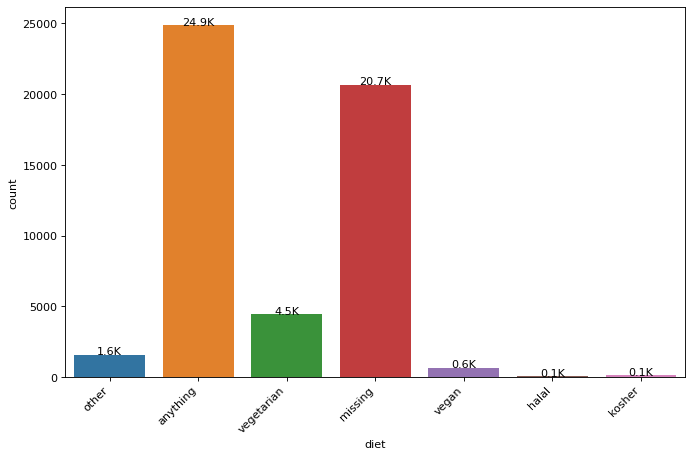

In [157]:
vc_hist(working, 'diet')

### Drink and Drugs Variation

In [173]:
print(working['drugs'].value_counts(dropna = False), "\n")
print(working['drinks'].value_counts(dropna = False))

drugs
never          33023
unspecified    12153
sometimes       6898
often            360
Name: count, dtype: int64 

drinks
socially          37190
rarely             5316
often              4568
not at all         2917
rather not say     1732
very often          418
desperately         293
Name: count, dtype: int64


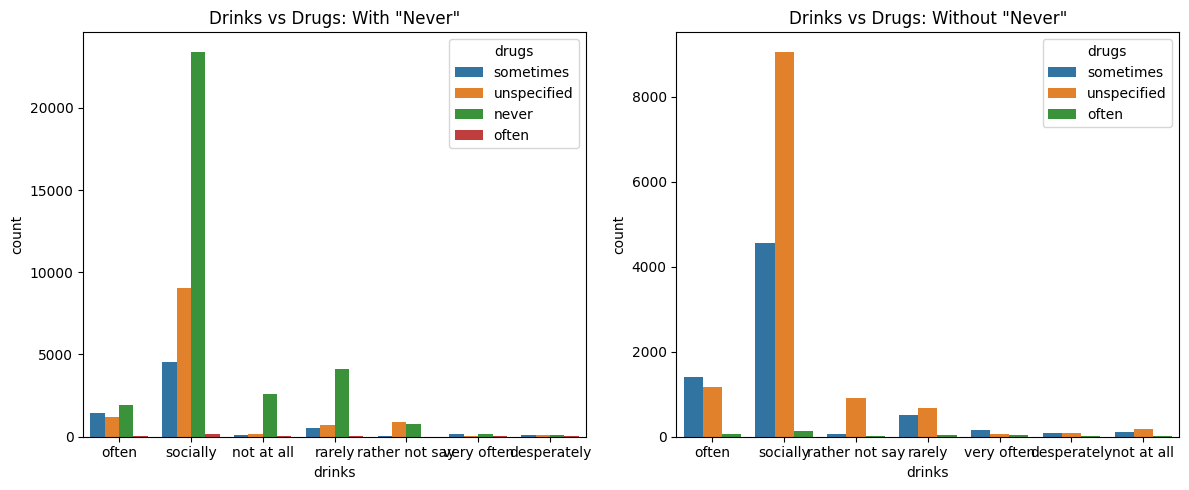

In [174]:
fig, axes = plt.subplots(1,2, figsize = (12, 5))
ax = sns.countplot(data = working, x = 'drinks', hue = 'drugs', ax = axes[0])
axes[0].set_title('Drinks vs Drugs: With "Never"')

ax = sns.countplot(data = working[working['drugs'] != 'never'], x = 'drinks', hue = 'drugs', ax = axes[1])
axes[1].set_title('Drinks vs Drugs: Without "Never"')

plt.tight_layout()
plt.show()

### Height Variation

In [160]:
working.height.describe()

count    52434.000000
mean        68.300530
std          3.908974
min         42.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

<Axes: xlabel='height', ylabel='Count'>

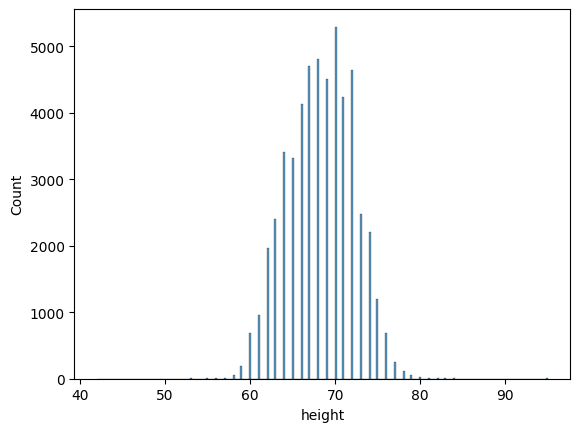

In [161]:
sns.histplot(data = working, x = 'height')

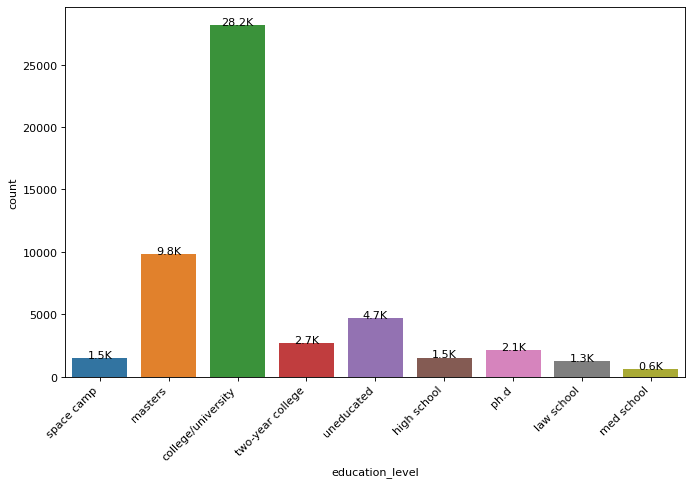

In [162]:
vc_hist(working, 'education_level')

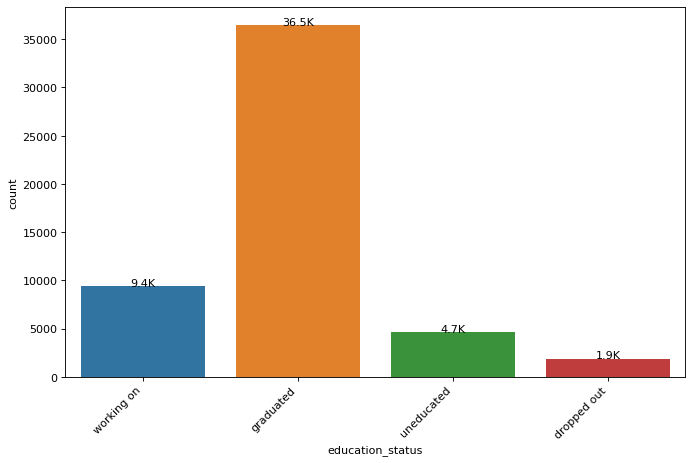

In [163]:
vc_hist(working, 'education_status')

### Job Variation

<function matplotlib.pyplot.show(close=None, block=None)>

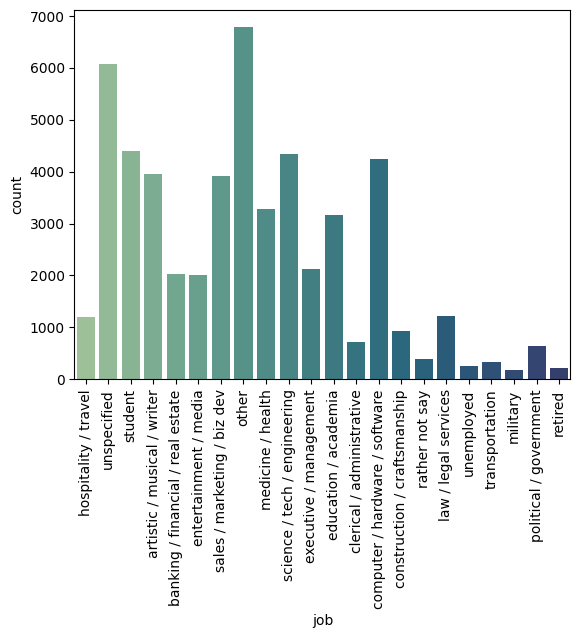

In [164]:
sns.countplot(data = working, x = 'job', hue = 'job', palette= "crest")

locs, labels = plt.xticks()
plt.setp(labels, rotation=90, ha = "center")

plt.show

### Last Online Variation

<Axes: xlabel='last_online', ylabel='count'>

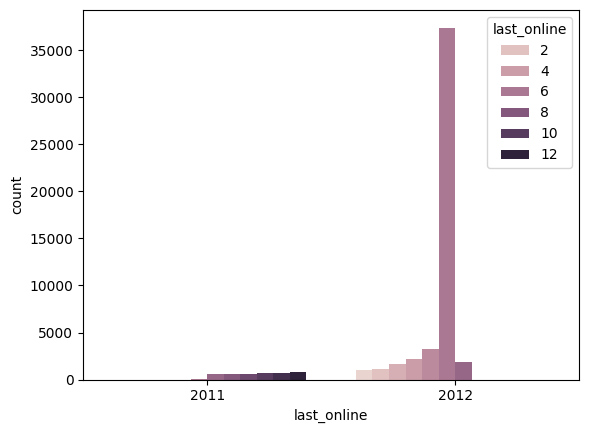

In [172]:
sns.countplot(data = working, x = working.last_online.dt.year, hue = working.last_online.dt.month)

### Location Variation

In [ ]:
#Please reffer to bubble_map.html

### Orientation Variation

### Sex Variation

### Smokes Variation

### Status variation

### Education Variation

### Religious Variation

### English Variation

# Experimentation & Refienment

## Data Preperation

## Model Selection

## Model Tuning

# Analysis & Conclusion